In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
f_birth=pd.read_csv('E:\Download\daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])
f_birth.head()
f_birth.tail()


,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [3]:
len(f_birth.columns)
f_birth_mean=f_birth.rolling(window=10).mean()

In [4]:
f_birth_mean.head(15)

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


<AxesSubplot:xlabel='date'>

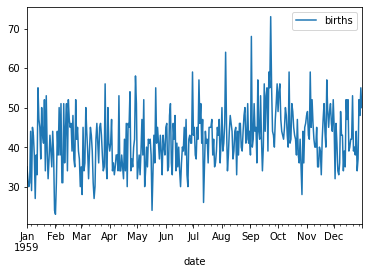

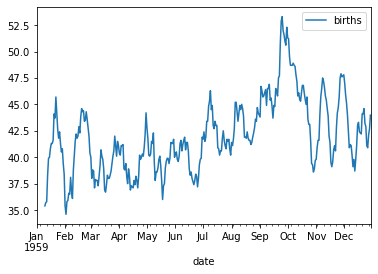

In [5]:
f_birth.plot()
f_birth_mean.plot()

In [6]:
series_values=f_birth.values
new=pd.DataFrame(series_values)

In [7]:
new=pd.concat([new,new.shift(1)], axis=1)

In [8]:
new.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [12]:
new.columns=['Actual_birth','Predicted_birth']
new.head()

,Actual_birth,Predicted_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [11]:
from sklearn.metrics import mean_squared_error
birth_test=new[1:]
birth_test.head()

,Actual_birth,Predicted_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [13]:
birth_error=mean_squared_error(birth_test.Actual_birth,birth_test.Predicted_birth)
birth_error 

84.22252747252747

In [14]:
np.sqrt(birth_error)

9.177283229394606

In [16]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# ARIMA=Autoregressive Integrated Moving Average



# P=Autoregressive d=Integrated Q=Moving Average


Now This method will be used as above simple baseline model was used

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

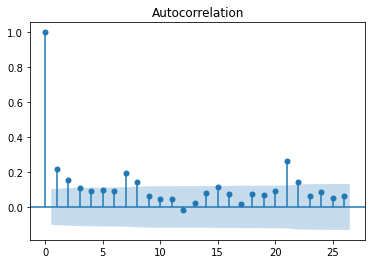

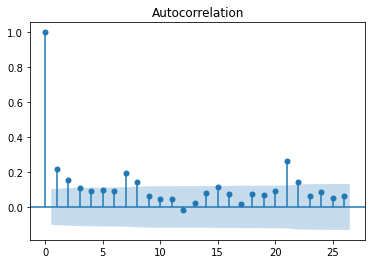

In [18]:
#plot_acf act as identify parameter Q
#ARIMA(p,d,q)
plot_acf(f_birth)

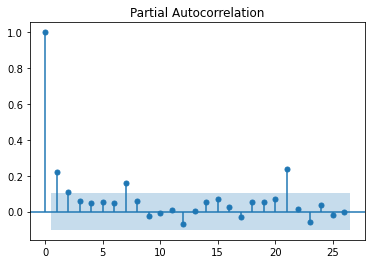

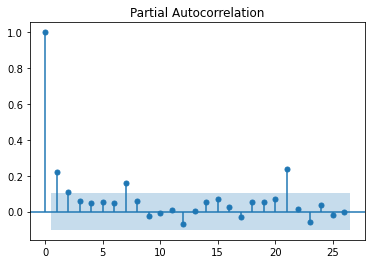

In [19]:
plot_pacf(f_birth)

As q is the value where it measure the correlation of the value as zero correlation is 1 since 1st value is purely correlated with

In [20]:
# p=2,3, d=0, q=3,4
birth_train=f_birth[:330]
birth_test=f_birth[330:365]

In [21]:
birth_train.size

330

In [23]:
birth_test.size

35

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
birth_model=ARIMA(birth_train,order=(2,1,3))

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [32]:
birth_model_fit=birth_model.fit()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [33]:
birth_model_fit.aic

2230.9482592499844

In [34]:
birth_forecast=birth_model_fit.forecast(steps=35)[0]

In [35]:
birth_forecast

array([45.30416564, 46.31047795, 43.64969905, 44.59274872, 46.4970714 ,
       44.34358608, 44.09038389, 46.34409155, 45.07540291, 43.88152546,
       45.95248165, 45.69584306, 43.97435273, 45.45716823, 46.10392324,
       44.31163919, 44.99279708, 46.26043788, 44.79371241, 44.66519161,
       46.18607331, 45.30663147, 44.53364785, 45.94711745, 45.74873711,
       44.60603413, 45.63384898, 46.05020626, 44.84561991, 45.33740447,
       46.18261541, 45.1862452 , 45.1302864 , 46.15813342, 45.5512314 ])

In [36]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [37]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.860053056930122